In [2]:
import pandas as pd
import numpy as np

In [3]:
neighborhoods = pd.read_csv("Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

In [5]:
neighborhoods.head()
print(len(neighborhoods))

21616


In [6]:
newyork = neighborhoods[neighborhoods['City'] == "New York"]

In [7]:
newyork.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31,2025-09-30,2025-10-31
2,270958,2,Upper West Side,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,411484.145898,...,1.334295e+06,1.342918e+06,1.346770e+06,1.343281e+06,1.337503e+06,1.331550e+06,1.328016e+06,1.322890e+06,1.321623e+06,1.325279e+06
3,270957,3,Upper East Side,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,679471.442275,...,1.324655e+06,1.331002e+06,1.329557e+06,1.319672e+06,1.308247e+06,1.299392e+06,1.297090e+06,1.297595e+06,1.303488e+06,1.312206e+06
6,194430,6,East New York,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County,157084.564803,...,6.421053e+05,6.410274e+05,6.399400e+05,6.412384e+05,6.428221e+05,6.447223e+05,6.454553e+05,6.463731e+05,6.481948e+05,6.498057e+05
7,272902,7,Bedford-Stuyvesant,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County,141539.612275,...,1.024763e+06,1.022595e+06,1.023690e+06,1.031214e+06,1.042422e+06,1.052903e+06,1.061369e+06,1.069898e+06,1.080552e+06,1.087437e+06
11,198687,11,Washington Heights,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,211531.647851,...,5.774053e+05,5.810227e+05,5.806378e+05,5.778736e+05,5.720669e+05,5.686097e+05,5.671563e+05,5.677366e+05,5.680953e+05,5.681033e+05


In [8]:
newyork['RegionName'].nunique()

197

In [9]:
len(newyork)

198

In [10]:
columns_to_keep = ["RegionID", "RegionName", "State", "City", "2025-01-31", "2025-02-28", "2025-03-31", "2025-04-30", "2025-05-31", "2025-06-30", "2025-07-31", "2025-08-31", "2025-09-30", "2025-10-31"]
newyork = newyork[columns_to_keep]

In [11]:
newyork['2025_mean'] = newyork.loc[:, '2025-01-31':'2025-10-31'].mean(axis=1)
newyork.head()

,RegionID,RegionName,State,City,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31,2025-09-30,2025-10-31,2025_mean
2,270958,Upper West Side,NY,New York,1.334295e+06,1.342918e+06,1.346770e+06,1.343281e+06,1.337503e+06,1.331550e+06,1.328016e+06,1.322890e+06,1.321623e+06,1.325279e+06,1.333412e+06
3,270957,Upper East Side,NY,New York,1.324655e+06,1.331002e+06,1.329557e+06,1.319672e+06,1.308247e+06,1.299392e+06,1.297090e+06,1.297595e+06,1.303488e+06,1.312206e+06,1.312290e+06
6,194430,East New York,NY,New York,6.421053e+05,6.410274e+05,6.399400e+05,6.412384e+05,6.428221e+05,6.447223e+05,6.454553e+05,6.463731e+05,6.481948e+05,6.498057e+05,6.441684e+05
7,272902,Bedford-Stuyvesant,NY,New York,1.024763e+06,1.022595e+06,1.023690e+06,1.031214e+06,1.042422e+06,1.052903e+06,1.061369e+06,1.069898e+06,1.080552e+06,1.087437e+06,1.049684e+06
11,198687,Washington Heights,NY,New York,5.774053e+05,5.810227e+05,5.806378e+05,5.778736e+05,5.720669e+05,5.686097e+05,5.671563e+05,5.677366e+05,5.680953e+05,5.681033e+05,5.728708e+05


In [12]:
keep = ["RegionID", "RegionName", "State", "City", '2025_mean']
newyork = newyork[keep]
newyork.head() 

,RegionID,RegionName,State,City,2025_mean
2,270958,Upper West Side,NY,New York,1.333412e+06
3,270957,Upper East Side,NY,New York,1.312290e+06
6,194430,East New York,NY,New York,6.441684e+05
7,272902,Bedford-Stuyvesant,NY,New York,1.049684e+06
11,198687,Washington Heights,NY,New York,5.728708e+05


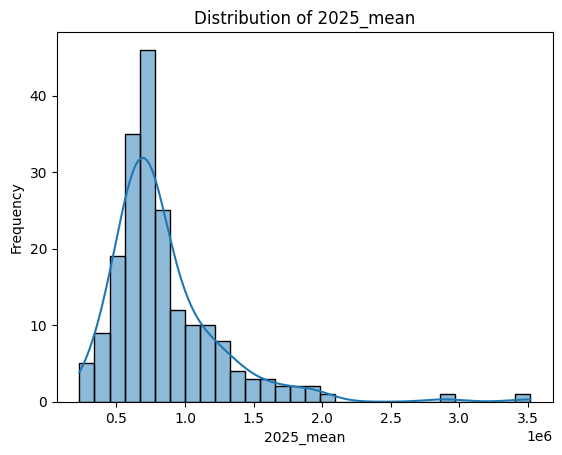

In [13]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.histplot(newyork['2025_mean'], kde=True, bins=30)
plt.title('Distribution of 2025_mean')
plt.xlabel('2025_mean')
plt.ylabel('Frequency')
plt.show()

In [14]:
print(newyork['RegionName'].values)

['Upper West Side' 'Upper East Side' 'East New York' 'Bedford-Stuyvesant'
 'Washington Heights' 'Flushing' 'Williamsburg' 'Crown Heights' 'Harlem'
 'Astoria' 'Borough Park' 'Sheepshead Bay' 'Bushwick' 'East Flatbush'
 'Concourse' 'Gravesend' 'Elmhurst' 'Midwood' 'Canarsie' 'Jackson Heights'
 'Sunset Park' 'Soundview' 'East Harlem' 'Jamaica' 'Bensonhurst'
 'Bay Ridge' 'Far Rockaway' 'Brownsville' 'Forest Hills' 'Lower East Side'
 'Corona' 'East Village' 'Ridgewood' 'Park Slope' 'Flatbush' 'Woodhaven'
 'Woodside' 'Queens Village' 'Fordham' 'St. Albans' 'Hamilton Heights'
 'Wakefield' "Hell's Kitchen" 'Tremont' 'Mott Haven' 'Maspeth' 'Chelsea'
 'Bayside' 'Kensington' 'East Tremont' 'Richmond Hill' 'Kingsbridge'
 'Riverdale' 'Williamsbridge' 'Springfield Gardens' 'Rego Park'
 'Coney Island' 'Kew Gardens Hills' 'Parkchester' 'Fresh Meadows'
 'Morris Heights' 'Whitestone' 'Inwood' 'Dyker Heights' 'Highbridge'
 'South Ozone Park' 'Greenpoint' 'Norwood' 'Middle Village' 'Glendale'
 'Throggs Ne